In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

path = './Documents/Kaggle/Titanic/data/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

data = pd.concat([train,test], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## Creating columns Surname and Title

In [115]:
data['Surname'] = data.Name.str.extract('(.*),', expand=False)
data['Title'] = data.Name.str.extract(' ([A-Z][a-z]+)\.', expand=False).replace(
    {'Dona': 'Rare Title', 'Lady': 'Rare Title', 'Countess': 'Rare Title', 'Capt': 'Rare Title',
     'Col': 'Rare Title', 'Don': 'Rare Title',
     'Dr': 'Rare Title', 'Major': 'Rare Title', 'Rev': 'Rare Title', 'Sir': 'Rare Title', 'Jonkheer': 'Rare Title',
     'Mlle': 'Miss','Ms':'Miss','Mme':'Mrs'})


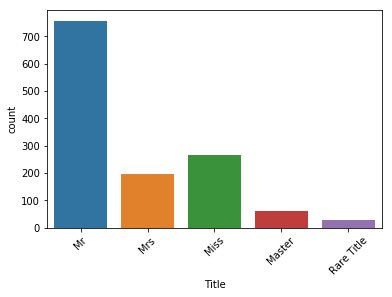

In [116]:
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [117]:
data.Surname.head(4)

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
Name: Surname, dtype: object

## Do families sink or swim together?

In [118]:
data['FamilySize'] = data.Parch + data.SibSp + 1

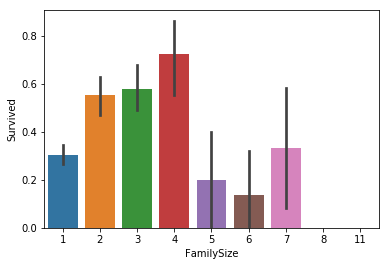

In [119]:
sns.barplot(x='FamilySize', y='Survived', data=data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
Surname        891 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
FSize          876 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 118.3+ KB
None


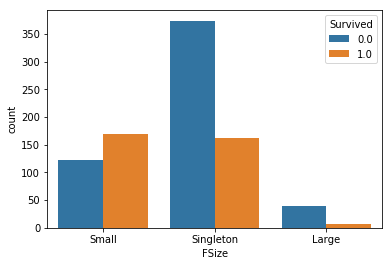

In [123]:
# Discretize family size

def getFSize(val):
    if val ==1:
        return 'Singleton'
    elif val > 1 and val < 5:
        return 'Small'
    elif val > 5:
        return 'Large'
data['FSize'] = data.FamilySize.apply(lambda x: getFSize(x))
print(data[~data['Survived'].isnull()].info())
sns.countplot(x='FSize',hue='Survived', data=data[~data['Survived'].isnull()])

## Passenger Cabin

In [125]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',